In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pathlib
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [24]:
data_dir = (r'D:\Rostock-Masters\Thesis\Data\images_2000')
data_dir

'D:\\Rostock-Masters\\Thesis\\Data\\images_2000'

In [25]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/Rostock-Masters/Thesis/Data/images_2000')

In [26]:
image_count_1 = list(data_dir.glob('Device_5/*'))
len(image_count_1)

101

In [27]:
Device_1 = list(data_dir.glob('Device_1/*'))
Device_1[:5]

[WindowsPath('D:/Rostock-Masters/Thesis/Data/images_2000/device_1/desktop.ini'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/images_2000/device_1/device_1-0.jpg'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/images_2000/device_1/device_1-1.jpg'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/images_2000/device_1/device_1-10.jpg'),
 WindowsPath('D:/Rostock-Masters/Thesis/Data/images_2000/device_1/device_1-11.jpg')]

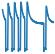

In [28]:
PIL.Image.open(str(Device_1[1]))

In [29]:
device_image_dict = {
    'Device_1' : list(data_dir.glob('Device_1/*.jpg')),
    'Device_2' : list(data_dir.glob('Device_2/*.jpg')),
    'Device_3' : list(data_dir.glob('Device_3/*.jpg')),
    'Device_4' : list(data_dir.glob('Device_4/*.jpg')),
    'Device_5' : list(data_dir.glob('Device_5/*.jpg')),
    'Device_6' : list(data_dir.glob('Device_6/*.jpg'))
}

In [30]:
device_image_dict['Device_1'][5]

WindowsPath('D:/Rostock-Masters/Thesis/Data/images_2000/device_1/device_1-13.jpg')

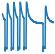

In [31]:
PIL.Image.open(str(device_image_dict['Device_5'][60]))

In [32]:
devices_label_dict = {
    'Device_1' : 0,
    'Device_2' : 1,
    'Device_3' : 2,
    'Device_4' : 3,
    'Device_5' : 4,
    'Device_6' : 5,
}

In [33]:
len(device_image_dict['Device_4'])

100

In [34]:
str(device_image_dict['Device_3'][0])

'D:\\Rostock-Masters\\Thesis\\Data\\images_2000\\device_3\\device_3-0.jpg'

### Classification

In [35]:
##Plot some random images

# plt.figure(figsize = (6, 6))

# for i in range(12):
#     plt.subplot(4, 4, i+1)
#     image_2= cv2.imread (str(device_image_dict['Device_1'][i]))
#     RGB_img = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
#     plt.imshow (RGB_img)
#     plt.axis('off')
# plt.savefig('subplot_random_images.png', dpi= 100)    
# plt.show()

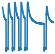

In [36]:
image_1= PIL.Image.open(str(device_image_dict['Device_4'][50]))
image_1

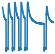

In [37]:
#Reading with cv2
image_2= cv2.imread (str(device_image_dict['Device_4'][50]))
#Converting to RGB
RGB_img = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
#plotting RGB images
image_3 = PIL.Image.fromarray(RGB_img)
image_3

In [38]:
img = cv2.imread(str(device_image_dict['Device_5'][50]))
img

array([[[253, 255, 254],
        [253, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 255, 254],
        [253, 255, 254],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 255, 255],
        [253, 255, 255],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [39]:
lst= []
for device_name, images in device_image_dict.items():
    print (device_name, ':',end = ' ')
    print(len(images))
    lst.append(len(images))
print(f'Total numbers of images are: {sum(lst)}')

Device_1 : 100
Device_2 : 100
Device_3 : 100
Device_4 : 100
Device_5 : 100
Device_6 : 100
Total numbers of images are: 600


In [40]:
# X, y = [],[]

# for device_name, folder in device_image_dict.items():
#     for image in folder:
#         img = cv2.imread(str(image))
#         resized_img = cv2.resize(img,(30,30))
#         X.append(resized_img)
#         y.append(devices_label_dict[device_name])

# Image shape

In [41]:
#Saving image data to a dataframe
device_list, label_list = [],[]

for device_name, folder in device_image_dict.items():
    for image in folder:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(35,35))
        flattened = resized_img.reshape(-1)
        df_flat= pd.DataFrame(flattened.reshape(1,-1))
        device_list.append(df_flat)
        label_list.append(devices_label_dict[device_name])

In [42]:
device_list[300]

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,253,250,255,255,249,246,255,253,251,255,...,255,255,255,255,255,255,255,255,255,255


In [43]:
df_merged= pd.concat(device_list)
df_merged= df_merged.reset_index(drop=True)
df_merged

,0,1,2,3,4,5,6,7,8,9,...,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674
0,250,251,255,253,253,255,252,249,248,255,...,255,255,255,255,255,255,255,255,255,255
1,228,250,255,253,253,239,255,255,239,255,...,255,255,255,255,255,255,255,255,255,255
2,251,253,254,246,246,250,250,255,252,248,...,255,255,255,255,255,255,255,255,255,255
3,242,250,255,254,252,244,255,254,247,245,...,255,255,255,255,255,255,255,255,255,255
4,253,244,255,238,251,241,238,254,247,247,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,233,248,255,253,254,246,255,255,240,252,...,255,255,255,255,255,255,255,255,255,255
596,230,245,255,253,252,249,253,252,243,249,...,255,255,255,255,255,255,255,255,255,255
597,226,247,255,252,254,249,254,253,240,250,...,255,255,255,255,255,255,255,255,255,255
598,245,249,249,251,251,255,249,255,252,248,...,255,255,255,255,255,255,255,255,255,255


In [44]:
#Merging, Adding label, shuffling
df_with_label= df_merged
df_with_label['label'] = label_list
# df_with_label.to_csv('device_with_label.csv', index=False)
df_1 = df_with_label.sample(frac = 1).reset_index(drop=True)
df_1

,0,1,2,3,4,5,6,7,8,9,...,3666,3667,3668,3669,3670,3671,3672,3673,3674,label
0,255,255,244,251,253,251,244,253,255,247,...,255,255,255,255,255,255,255,255,255,3
1,240,254,254,251,245,250,254,250,249,254,...,255,255,255,255,255,255,255,255,255,3
2,234,254,254,253,246,255,253,249,254,248,...,255,255,255,255,255,255,255,255,255,5
3,254,251,255,255,252,255,247,254,249,244,...,255,255,255,255,255,255,255,255,255,1
4,244,251,255,246,248,251,255,255,251,255,...,255,255,255,255,255,255,255,255,255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,239,250,255,243,249,251,255,255,251,255,...,255,255,255,255,255,255,255,255,255,5
596,249,253,254,246,250,254,251,252,249,255,...,255,255,255,255,255,255,255,255,255,2
597,255,249,254,252,253,250,248,255,247,255,...,255,255,255,255,255,255,255,255,255,2
598,242,244,255,254,253,243,255,255,240,247,...,255,255,255,255,255,255,255,255,255,0


In [46]:
y= np.array(df_1.label)

In [47]:
df_1.drop('label', axis=1,inplace= True)

In [48]:
df_1.shape

(600, 3675)

In [49]:
resized_img.shape

(35, 35, 3)

In [50]:
X = np.array(df_1).reshape(df_1.shape[0],resized_img.shape[0],resized_img.shape[1],resized_img.shape[2])
X.shape

(600, 35, 35, 3)

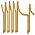

In [51]:
data = PIL.Image.fromarray(X[1])
data

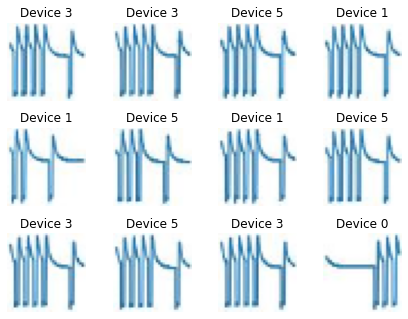

In [52]:
plt.figure(figsize = (6, 6))

for i in range(12):
    plt.subplot(4, 4, i+1).set_title(f'Device {y[i]}')
    RGB_img = cv2.cvtColor(np.squeeze(X[i]), cv2.COLOR_BGR2RGB)
    plt.imshow (RGB_img)
    plt.axis('off')

plt.tight_layout()
plt.savefig('6_M2_image_random_subplot.png', dpi=300)

In [53]:
y[599]

2

In [54]:
X.shape

(600, 35, 35, 3)

In [55]:
len(X), len(y)

(600, 600)

In [56]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30,random_state=42, stratify= y)

In [57]:
X_train.shape

(420, 35, 35, 3)

In [58]:
X_test.shape

(180, 35, 35, 3)

In [59]:
len(X_train)

420

In [60]:
#Print shapes
print('Train tensor shape: ',X_train.shape)
print('Test tensor shape: ',X_test.shape)
print('Single image shape:', X_train[0].shape)
print('Train_labels shape:', y_train.shape)
print('Test_labels shape:', y_test.shape)

Train tensor shape:  (420, 35, 35, 3)
Test tensor shape:  (180, 35, 35, 3)
Single image shape: (35, 35, 3)
Train_labels shape: (420,)
Test_labels shape: (180,)


In [61]:
#scaling data from 0 to 1
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [62]:
X_train_scaled[101].shape

(35, 35, 3)

In [63]:
y_test[10:20]

array([1, 1, 1, 5, 0, 5, 4, 0, 0, 2], dtype=int64)

In [64]:
#Building a model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding="same", activation='relu',kernel_initializer='he_normal',
                           input_shape=(X_train_scaled[0].shape)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(16,3, padding="same", activation='relu',kernel_initializer='he_normal',),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32,3, padding="same",activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64,3, padding="same",activation='relu',kernel_initializer='he_normal', ),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,kernel_initializer='normal',activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256,kernel_initializer='normal',activation='relu'),#kernel_initializer='normal'
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation= 'softmax') #Output layer
])
model_2.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 16)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          4

In [65]:
model_2.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history= model_2.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.20, shuffle = True) #validation_split=0.33
history

Epoch 1/200
6/6 [==============================] - 40s 78ms/step - loss: 1.8948 - accuracy: 0.1726 - val_loss: 1.8500 - val_accuracy: 0.1071
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8585 - accuracy: 0.1369 - val_loss: 1.8295 - val_accuracy: 0.1786
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8274 - accuracy: 0.1845 - val_loss: 1.8443 - val_accuracy: 0.1667
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 1.8339 - accuracy: 0.1667 - val_loss: 1.8530 - val_accuracy: 0.1667
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8071 - accuracy: 0.1964 - val_loss: 1.8365 - val_accuracy: 0.1310
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8142 - accuracy: 0.1637 - val_loss: 1.8264 - val_accuracy: 0.1071
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 1.8050 - accuracy: 0.1875 - val_loss: 1.8322 - val_accuracy: 0.1071
Epoch 8/200
6/6 [==

6/6 [==============================] - 0s 13ms/step - loss: 1.3225 - accuracy: 0.4435 - val_loss: 1.6518 - val_accuracy: 0.2500
Epoch 118/200
6/6 [==============================] - 0s 15ms/step - loss: 1.2753 - accuracy: 0.4762 - val_loss: 1.6239 - val_accuracy: 0.2262
Epoch 119/200
6/6 [==============================] - 0s 14ms/step - loss: 1.2807 - accuracy: 0.5030 - val_loss: 1.6661 - val_accuracy: 0.2143
Epoch 120/200
6/6 [==============================] - 0s 14ms/step - loss: 1.2888 - accuracy: 0.4940 - val_loss: 1.6594 - val_accuracy: 0.2024
Epoch 121/200
6/6 [==============================] - 0s 17ms/step - loss: 1.2762 - accuracy: 0.5119 - val_loss: 1.6496 - val_accuracy: 0.2262
Epoch 122/200
6/6 [==============================] - 0s 13ms/step - loss: 1.3041 - accuracy: 0.4732 - val_loss: 1.6564 - val_accuracy: 0.2262
Epoch 123/200
6/6 [==============================] - 0s 11ms/step - loss: 1.2625 - accuracy: 0.4702 - val_loss: 1.6458 - val_accuracy: 0.2500
Epoch 124/200
6/6 [=

Epoch 175/200
6/6 [==============================] - 0s 15ms/step - loss: 0.9904 - accuracy: 0.5952 - val_loss: 1.6368 - val_accuracy: 0.2976
Epoch 176/200
6/6 [==============================] - 0s 13ms/step - loss: 1.0424 - accuracy: 0.5714 - val_loss: 1.6865 - val_accuracy: 0.3333
Epoch 177/200
6/6 [==============================] - 0s 11ms/step - loss: 0.9708 - accuracy: 0.6250 - val_loss: 1.6668 - val_accuracy: 0.3095
Epoch 178/200
6/6 [==============================] - 0s 14ms/step - loss: 0.9922 - accuracy: 0.5952 - val_loss: 1.6796 - val_accuracy: 0.2619
Epoch 179/200
6/6 [==============================] - 0s 14ms/step - loss: 1.0078 - accuracy: 0.6012 - val_loss: 1.6966 - val_accuracy: 0.2738
Epoch 180/200
6/6 [==============================] - 0s 11ms/step - loss: 1.0090 - accuracy: 0.5804 - val_loss: 1.6445 - val_accuracy: 0.3214
Epoch 181/200
6/6 [==============================] - 0s 13ms/step - loss: 0.9904 - accuracy: 0.6101 - val_loss: 1.6766 - val_accuracy: 0.2738
Epoch 

In [66]:
print('Validation accuracy : ', (np.mean(history.history['val_accuracy'][-50:]))*100, '%') # Mean of last 50 values

Validation accuracy :  29.595238596200947 %


In [67]:
# model_2.save('saved_model.h5')

In [68]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

6/6 [==============================] - 0s 3ms/step - loss: 1.4840 - accuracy: 0.4056
Loss: 1.4840368032455444, Accuracy: 0.4055555462837219
Test accuracy :  40.55555462837219 %


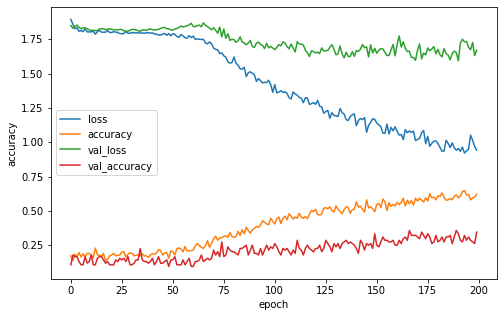

In [69]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel('epoch')
plt.ylabel('accuracy')
# plt.savefig('6_image_loss_accuracy_44.png', dpi= 100)
plt.show()

In [70]:
y_pred = model_2.predict(X_test_scaled)
# y_pred[:10]

6/6 [==============================] - 0s 2ms/step


In [71]:
y_pred_class = [np.argmax(i) for i in y_pred]
y_pred_class[:10]

[3, 3, 3, 2, 1, 0, 4, 5, 3, 3]

In [72]:
y_test[:10]

array([4, 2, 3, 5, 1, 0, 3, 2, 3, 2], dtype=int64)

In [73]:
loss, accuracy= model_2.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
print('Test accuracy : ',accuracy*100,'%')

6/6 [==============================] - 0s 6ms/step - loss: 1.4840 - accuracy: 0.4056
Loss: 1.4840368032455444, Accuracy: 0.4055555462837219
Test accuracy :  40.55555462837219 %


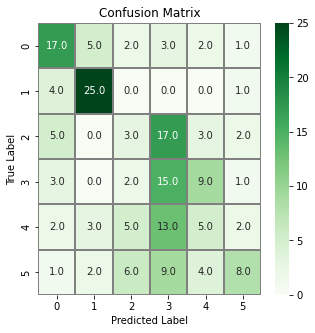

In [74]:
#Confusion matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred_class)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=devices_label_dict)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
# disp.plot(ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
# plt.savefig('6_image_matrix-44.png',bbox_inches = 'tight', pad_inches = 0, dpi= 100)
plt.show()

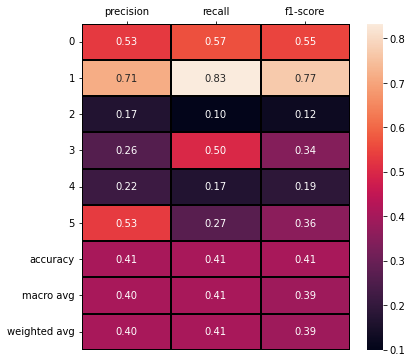

In [75]:
clf_report= classification_report(y_test, y_pred_class,output_dict=True)

 #.iloc[:-1, :] to exclude support
fig, ax = plt.subplots(figsize=(6,6))

# sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues",linecolor="black", fmt= '.2f')
ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True,linewidths=0.01,linecolor="black", fmt= '.2f')# cmap="Blues",
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
# plt.savefig('clf_report_6-M2_image_44.png',bbox_inches = 'tight', pad_inches = 0, dpi= 100)
